

# <center>Regressão Linear Simples</center>


#### Sobre este notebook
Neste notebook, aprendemos a usar o scikit-learn para implementar uma regressão linear simples. Fazemos o download de um conjunto de dados relacionado ao consumo de combustível e à emissão de dióxido de carbono dos carros. Em seguida, dividimos nossos dados em conjuntos de treinamento e teste, criamos um modelo usando o conjunto de treinamento, avaliamos seu modelo usando o conjunto de testes e finalmente usamos o modelo para prever o valor desconhecido.


### Importando pacotes necessários

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

### Downloading Data
Para baixar os dados, usaremos !wget para fazer o download do IBM Object Storage.

In [2]:
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

--2018-10-09 19:12:17--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.193
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[=====================>]  70.93K  --.-KB/s   in 0.04s  

2018-10-09 19:12:17 (1.60 MB/s) - ‘FuelConsumption.csv’ saved [72629/72629]




## Entendendo os dados

### `FuelConsumption.csv`:
Nós baixamos um conjunto de dados de consumo de combustível, **`FuelConsumption.csv`**, que contém classificações de consumo de combustível específicas do modelo e emissões estimadas de dióxido de carbono para veículos leves novos para venda a varejo no Canadá. [Fonte do conjunto de dados] (http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64)

- **MODELYEAR** e.g. 2014
- **MAKE** e.g. Acura
- **MODEL** e.g. ILX
- **VEHICLE CLASS** e.g. SUV
- **ENGINE SIZE** e.g. 4.7
- **CYLINDERS** e.g 6
- **TRANSMISSION** e.g. A6
- **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
- **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
- **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
- **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0


## Lendo o Dataset

In [3]:
df = pd.read_csv("FuelConsumption.csv")

# Visualizando as 5 primeiras linhas de nosso dataset
df.head()



,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


### Explorando os dados
Vamos primeiro ter uma exploração descritiva dos nossos dados.

In [5]:
# Resumo dos dados, como quantidade, media, desvio padrão entre outras informações
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


Selecionando alguns recursos para melhor exploração.

In [6]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


Visualizando os dados de nosso dataset, utilizando o histograma como forma de visulização:

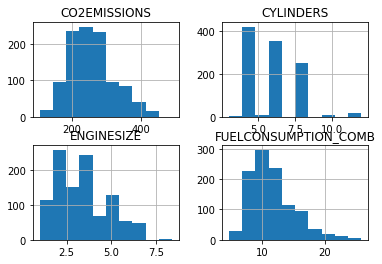

In [7]:
viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()

Agora, vamos verificar cada característica em relação à Emissão, para ver como é linear sua relação:

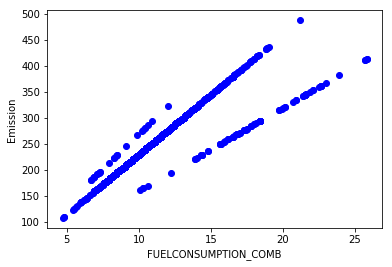

In [8]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

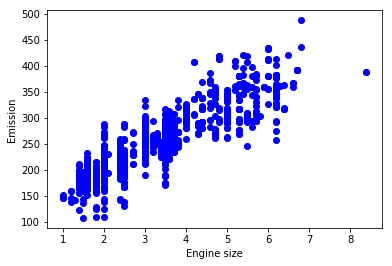

In [9]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

## Praticando
plotando __CYLINDER__ vs the Emission, para ver quão linear é a sua relação:

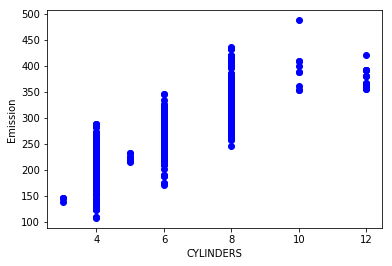

In [10]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("CYLINDERS")
plt.ylabel("Emission")
plt.show()


#### Criando conjunto de dados de treino e teste
A divisão de treino/teste envolve a divisão do conjunto de dados em conjuntos de treinamento e testes, respectivamente, que são mutuamente exclusivos. Depois disso, você treina com o conjunto de treinamento e testa com o conjunto de testes.
Isso fornecerá uma avaliação mais precisa da precisão fora da amostra, porque o conjunto de dados de teste não faz parte do conjunto de dados que foi usado para treinar os dados. É mais realista para problemas do mundo real.

Isso significa que sabemos o resultado de cada ponto de dados neste conjunto de dados, o que é ótimo para testar! E como esses dados não foram usados ​​para treinar o modelo, o modelo não tem conhecimento do resultado desses pontos de dados. Então, em essência, é realmente um teste fora da amostra.

Vamos dividir nosso conjunto de dados em conjuntos de treinamento e teste, 80% de todos os dados para treinamento e 20% para testes. Criamos uma máscara para selecionar linhas aleatórias usando a função __np.random.rand ()__:

In [11]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

### Modelo de Regressão Simples
A Regressão Linear ajusta um modelo linear com coeficientes B = (B1, ..., Bn) para minimizar a __'soma residual de quadrados'__ entre o X independente no conjunto de dados e o Y dependente pela aproximação linear.

#### Distribuição dos dados de treinamento

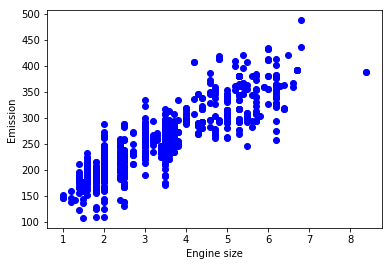

In [12]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

#### Comemençado a modelar
Usando o pacote sklearn para modelar dados.

In [13]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (train_x, train_y)

# Os Coeficientes
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[38.94493225]]
Intercept:  [125.05029459]


Como mencionado anteriormente, __Coefficient__ e __Intercept__ na regressão linear simples, são os parâmetros da linha de ajuste.
Dado que se trata de uma regressão linear simples, com apenas 2 parâmetros, e sabendo que os parâmetros são o intercepto e a inclinação da linha, o sklearn pode estimar diretamente a partir de nossos dados.
Observe que todos os dados devem estar disponíveis para percorrer e calcular os parâmetros.

#### Plotando a saída

podemos traçar a linha de ajuste sobre os dados:

Text(0,0.5,'Emission')

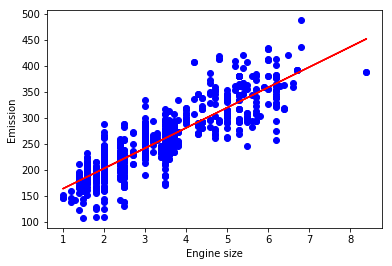

In [14]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

#### Avaliação 
Nós comparamos os valores reais e os valores previstos para calcular a precisão de um modelo de regressão. As métricas de avaliação fornecem um papel fundamental no desenvolvimento de um modelo, pois fornece insights para áreas que requerem melhorias.

Existem diferentes métricas de avaliação de modelo, vamos usar o MSE aqui para calcular a precisão do nosso modelo com base no conjunto de testes:
    - Erro absoluto médio: é a média do valor absoluto dos erros. Essa é a maneira mais fácil de entender as métricas, pois é apenas um erro médio.
    - Erro Quadrático Médio (MSE): Erro Quadrático Médio (MSE) é a média do erro quadrado. É mais popular que o erro absoluto médio porque o foco é voltado mais para erros grandes. Isso se deve ao fato de o termo ao quadrado aumentar exponencialmente os erros maiores em comparação com os menores.
    - Erro Quadrático Médio da Raiz (RMSE).
    - R-quadrado não é erro, mas é uma métrica popular para a precisão do seu modelo. Ele representa o quão próximos os dados estão da linha de regressão ajustada. Quanto maior o R-quadrado, melhor o modelo se adapta aos seus dados. A melhor pontuação possível é 1.0 e pode ser negativa (porque o modelo pode ser arbitrariamente pior).

In [17]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

print("Erro Quadrático Médio: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Soma residual de quadrados (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Erro Quadrático Médio: 22.57
Soma residual de quadrados (MSE): 854.43
R2-score: 0.70


### Obrigado pela atenção

Notebook created by: <a href = "https://www.linkedin.com/in/samuel-oliveira-74278873/">Samuel Oliveira</a>